In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [9]:
cd /gdrive/My Drive/Biomedical Image Processing ED6001/Biomedical Assignment/Biomedical assignment 2-EE19s042

/gdrive/My Drive/Biomedical Image Processing ED6001/Biomedical Assignment/Biomedical assignment 2-EE19s042


In [10]:
import cv2
import numpy as np
import random
import skimage
from matplotlib import pyplot as plt
import pandas as pd
import time
import math
from mpl_toolkits.mplot3d import Axes3D
import argparse
from google.colab import files
from scipy.ndimage.filters import convolve
import skimage.io as io
from skimage import color
from mpl_toolkits.mplot3d import Axes3D

In [11]:
!ls


 27
'Final Biomedical Assignment 2-EE19s042'
'Final Biomedical Assignment 2-EE19s042.rar'


**Image Contrast Enhancement using Histogram equalisation**

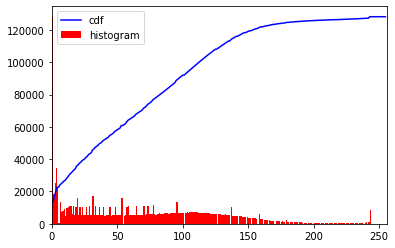

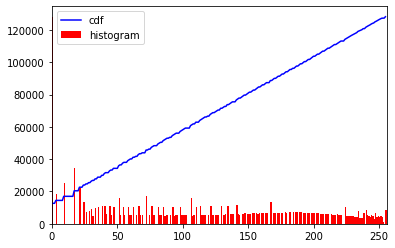

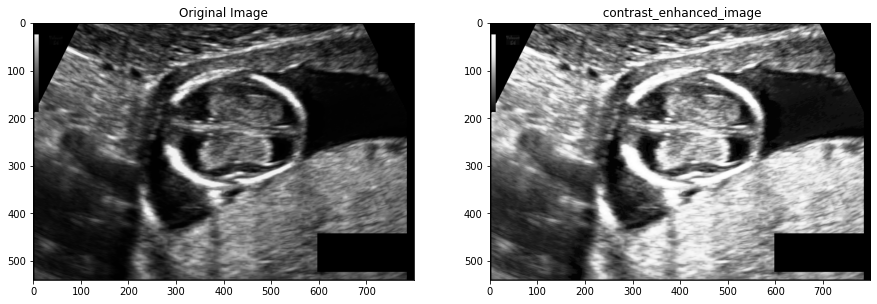

In [12]:
img=cv2.imread("27/108_3HC.png")
hist,bins = np.histogram(img.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()


plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m= (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')

img2 = cdf[img]
hist2,bins2 = np.histogram(img2.flatten(),256,[0,256])

cdf2 = hist2.cumsum()
cdf_normalized2 = cdf2 * hist2.max()/ cdf2.max()
plt.plot(cdf_normalized2, color = 'b')
plt.hist(img2.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()


display = [img, img2  ]
label = ['Original Image', ' contrast_enhanced_image']

fig = plt.figure(figsize=(15,15))

for i in range(len(display)):
  fig.add_subplot(2, 2, i+1)
  plt.imshow(display[i], cmap = 'gray')
  plt.title(label[i])
plt.show()


# fig.savefig('out/Part 2/Contrst_Enhanced_Histogram_img.png')
# files.download('out/Part 2/Contrst_Enhanced_Histogram_img.png')

**Image Contrast Adaptive Histogram Enhancement(CLAHE) using Histogram equalisation**

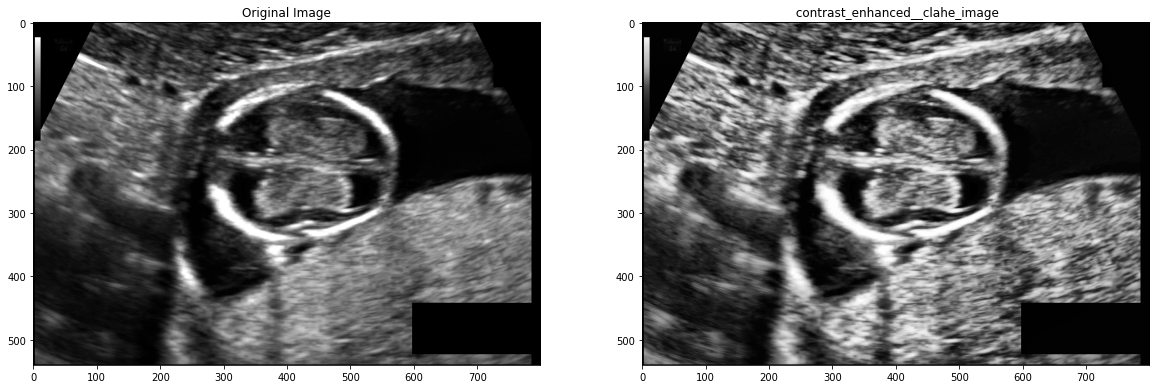

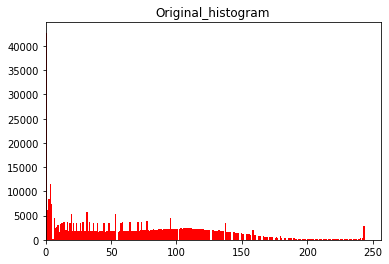

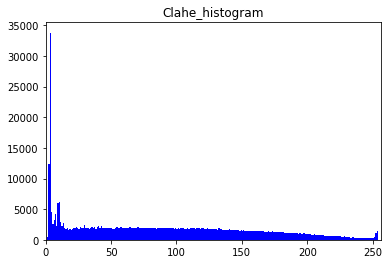

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# create a CLAHE object (Arguments are optional).
import cv2
img=cv2.imread("27/108_3HC.png")
img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
clahe_img = clahe.apply(img)


display = [img, clahe_img  ]
label = ['Original Image', ' contrast_enhanced__clahe_image']

fig = plt.figure(figsize=(15,15))

for i in range(len(display)):
  fig.add_subplot(2, 2, i+1)
  plt.imshow(display[i], cmap = 'gray')
  plt.title(label[i])
plt.figure()
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.title('Original_histogram')
plt.show()
plt.figure()
# plt.plot(cdf_normalized2, color = 'b')
plt.hist(clahe_img.flatten(),256,[0,256], color = 'b')
plt.xlim([0,256])
plt.title('Clahe_histogram')
plt.show()

# fig.savefig('out/Part 2/Contrst_Enhanced_Histogram_img_Clahe.png')
# files.download('out/Part 2/Contrst_Enhanced_Histogram_img_Clahe.png')

In [ ]:
# img=plt.imread("27/108_3HC.png")
# img.shape

(540, 800)

**Canny Edge Filter Detection**

In [ ]:
def cannyEdge(img, sigma, weak_th, strong_th):
    """
    
    :param im:input image
    :param sigma: sigma is the std-deviation and refers to spread of gaussian
    :param weak_th:low threshold used to identify weak edges...
    :param strong_th: high threshold used to identify strong edges...

    """

    size = int(2*(np.ceil(3*sigma))+1)

    x, y = np.meshgrid(np.arange(-size/2+1, size/2+1),
                       np.arange(-size/2+1, size/2+1))

    normal = 1 / (2.0 * np.pi * sigma**2)

    kernel = np.exp(-(x**2+y**2) / (2.0*sigma**2)) / \
        normal  # calculating gaussian filter

    kern_size, gauss = kernel.shape[0], np.zeros_like(img, dtype=float)

    for i in range(img.shape[0]-(kern_size-1)):
        for j in range(img.shape[1]-(kern_size-1)):
            window = img[i:i+kern_size, j:j+kern_size] * kernel
            gauss[i, j] = np.sum(window)

    kernel, kern_size = np.array(
        [[-1, -2, -1], [0, 0, 0], [1, 2, 1]]), 3  # edge detection
    gx, gy = np.zeros_like(
        gauss, dtype=float), np.zeros_like(gauss, dtype=float)

    for i in range(gauss.shape[0]-(kern_size-1)):
        for j in range(gauss.shape[1]-(kern_size-1)):
            window = gauss[i:i+kern_size, j:j+kern_size]
            gx[i, j], gy[i, j] = np.sum(
                window * kernel.T), np.sum(window * kernel)

    magnitude = np.sqrt(gx**2 + gy**2)
    theta = ((np.arctan(gy/gx))/np.pi) * 180  # radian to degree conversion
    nms = np.copy(magnitude)

    theta[theta < 0] += 180

    # non maximum suppression; quantization and suppression done in same step
    for i in range(theta.shape[0]-(kern_size-1)):
        for j in range(theta.shape[1]-(kern_size-1)):
            if (theta[i, j] <= 22.5 or theta[i, j] > 157.5):
                if(magnitude[i, j] <= magnitude[i-1, j]) and (magnitude[i, j] <= magnitude[i+1, j]):
                    nms[i, j] = 0
            if (theta[i, j] > 22.5 and theta[i, j] <= 67.5):
                if(magnitude[i, j] <= magnitude[i-1, j-1]) and (magnitude[i, j] <= magnitude[i+1, j+1]):
                    nms[i, j] = 0
            if (theta[i, j] > 67.5 and theta[i, j] <= 112.5):
                if(magnitude[i, j] <= magnitude[i+1, j+1]) and (magnitude[i, j] <= magnitude[i-1, j-1]):
                    nms[i, j] = 0
            if (theta[i, j] > 112.5 and theta[i, j] <= 157.5):
                if(magnitude[i, j] <= magnitude[i+1, j-1]) and (magnitude[i, j] <= magnitude[i-1, j+1]):
                    nms[i, j] = 0
    mag_max = np.max(magnitude) 
    # if not weak_th:weak_th = mag_max * 0.1
    # if not strong_th:strong_th = mag_max * 0.5
    weak_th =mag_max * 0.05
    strong_th =mag_max * 0.1
    weak, strong = np.copy(nms), np.copy(nms)
    
    # weak edges
    weak[weak < weak_th] = 0
    weak[weak > weak_th] = 1

    # strong edges
    strong[strong < strong_th] = 0
    strong[strong > strong_th] = 1
    difference=weak-strong

    return gauss, magnitude, weak, strong, difference





/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:41: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in less


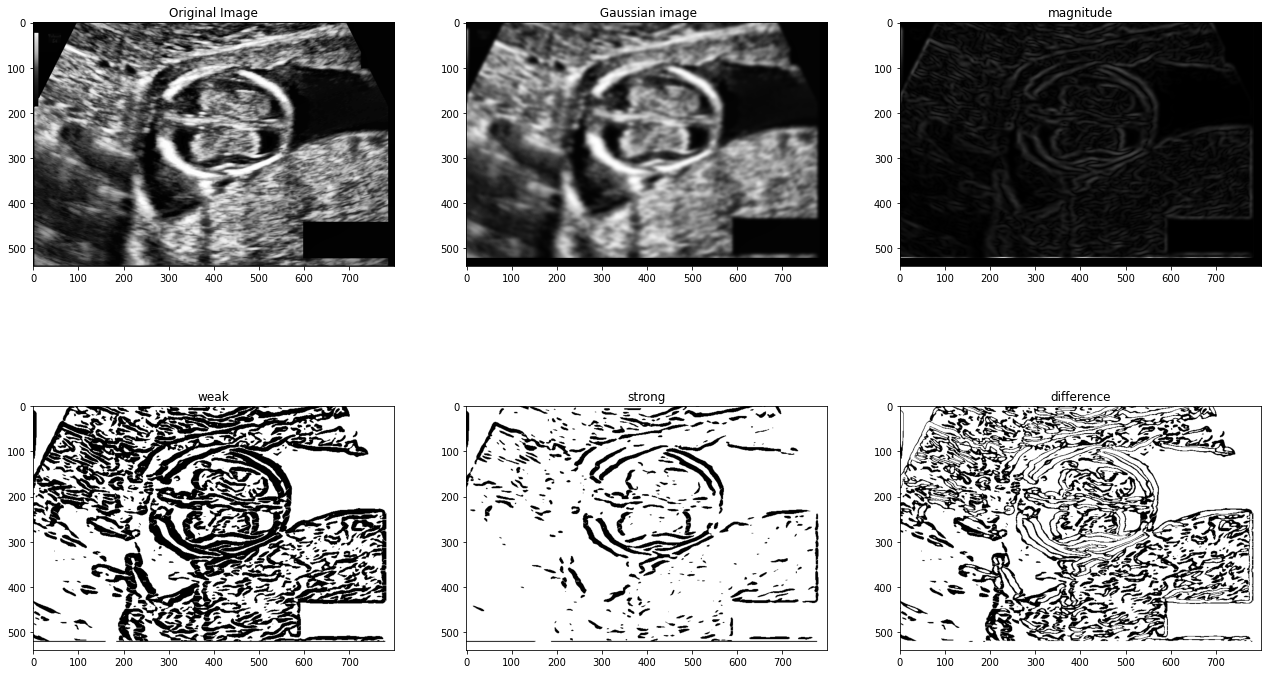

In [ ]:

img=cv2.imread("27/108_3HC.png")
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
sigma=3
lower_thresh=50
upper_thresh=100


gauss, magnitude, weak, strong, difference= cannyEdge(
        clahe_img, sigma, lower_thresh, upper_thresh)
display = [clahe_img, gauss, magnitude, 255-weak, 255-strong, 255-difference]
label = ['Original Image', ' Gaussian image', 'magnitude', 'weak', 'strong','difference']

fig = plt.figure(figsize=(15,15))

for i in range(len(display)):
  fig.add_subplot(3,3, i+1)
  plt.imshow(display[i], cmap = 'gray')
  plt.title(label[i])

plt.show()
# fig.savefig('out/Part 2/Canny_Edge.png')
# files.download('out/Part 2/Canny_Edge.png')

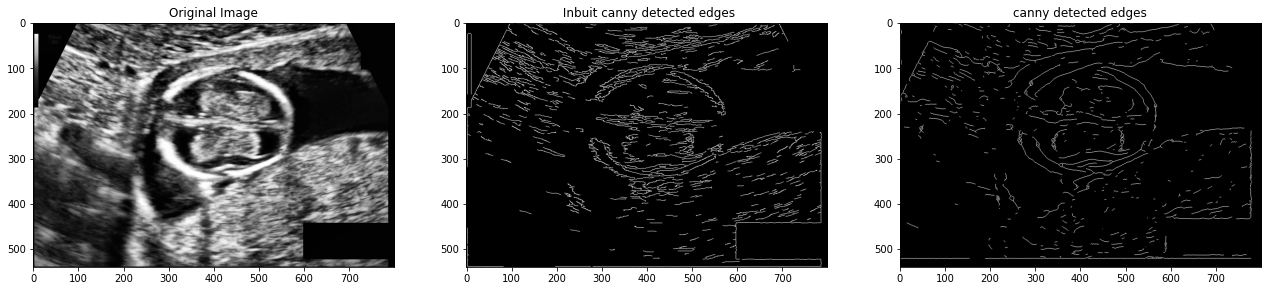

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from skimage.morphology import medial_axis, skeletonize
#img = cv2.imread('messi5.jpg',0)
edges = cv2.Canny(img,100,200)
#plt.imshow(thin,cmap="gray")
skel, distance = medial_axis(strong, return_distance=True)
dist_on_skel = distance * skel
# axs[1].set_title('medial_distance')
# axs[1].imshow(skel,cmap="gray")

display = [clahe_img, edges, skel]
label = ['Original Image', ' Inbuit canny detected edges','canny detected edges']

fig = plt.figure(figsize=(15,15))

for i in range(len(display)):
  fig.add_subplot(1,3, i+1)
  plt.imshow(display[i], cmap = 'gray')
  plt.title(label[i])

plt.show()
fig.savefig('out/Part 2/Canny_Edge_Inbuilt.png')
files.download('out/Part 2/Canny_Edge_Inbuilt.png')


**Prewitt Filter**

In [ ]:
def prewittEdge(pr_img):
    """
    :param pr_img:input image
  
    """
    source_array=np.zeros(pr_img.shape)
    img_prewitt_x=np.zeros(pr_img.shape)
    img_prewitt_y=np.zeros(pr_img.shape)
    kernel, kern_size = np.array(
        [[-1, -1, -1], [0, 0, 0], [1, 1, 1]]), 3  # edge detection
    #gx, gy = np.zeros_like(
       # gauss, dtype=float), np.zeros_like(gauss, dtype=float)
    gy=kernel
    gx=kernel.T
    kernel_half = int(kern_size/2)
    threshold = 0
    for y in range(2, pr_img.shape[1]-2):

      for x in range(2, pr_img.shape[0]-2):
            r_gx, r_gy = 0, 0
            for kernel_offset_y in range(-kernel_half, kernel_half + 1):

                for kernel_offset_x in range(-kernel_half, kernel_half + 1):

                    xx = x + kernel_offset_x
                    yy = y + kernel_offset_y
                    #color = self.surface.get_at((xx, yy))
                    # print(kernel_offset_y, kernel_offset_x)
                    if kernel_offset_x != 0:

                        k = gx[kernel_offset_x + kernel_half,
                                    kernel_offset_y + kernel_half]
                        r_gx += pr_img[xx,yy] * k

                    if kernel_offset_y != 0:
                        k = gy[kernel_offset_x + kernel_half,
                                    kernel_offset_y + kernel_half]
                        r_gy += pr_img[xx,yy] * k

            magnitude = math.sqrt(r_gx ** 2 + r_gy ** 2)
            # update the pixel if the magnitude is above threshold else black pixel
            source_array[x, y] = magnitude if magnitude > threshold else 0
            img_prewitt_x[x,y]=r_gx
            img_prewitt_y[x,y]=r_gy
    # cap the values
    np.putmask(source_array, source_array > 255, 255)
    np.putmask(source_array, source_array < 0, 0)
    np.putmask(img_prewitt_x, img_prewitt_x > 255, 255)
    np.putmask(img_prewitt_x, img_prewitt_x < 0, 0)
    np.putmask(img_prewitt_y, img_prewitt_y > 255, 255)
    np.putmask(img_prewitt_y, img_prewitt_y < 0, 0)
    return source_array,img_prewitt_x,img_prewitt_y
    #return gauss,magnitude

In [ ]:
output_prewitt_x.shape

(540, 800)

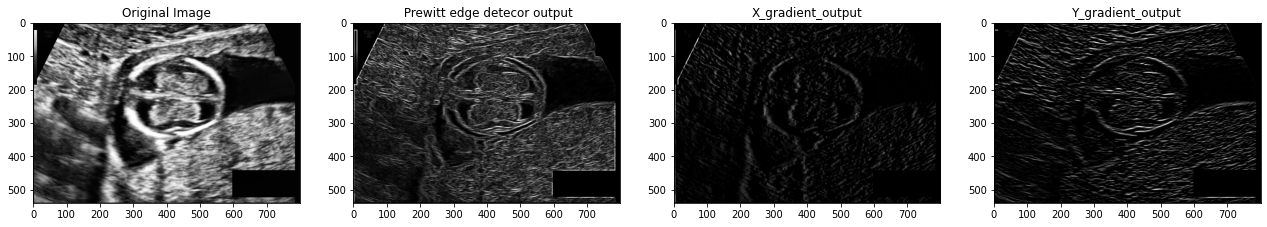

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
output_prewitt,output_prewitt_x,output_prewitt_y=prewittEdge(clahe_img)
###Display
display = [clahe_img, output_prewitt,output_prewitt_x,output_prewitt_y]
label = ['Original Image', ' Prewitt edge detecor output', 'X_gradient_output', 'Y_gradient_output']

fig = plt.figure(figsize=(22,20))

for i in range(len(display)):
  fig.add_subplot(1,4, i+1)
  plt.imshow(display[i], cmap = 'gray')
  plt.title(label[i])

plt.show()
# fig.savefig('out/Part 2/Prewitt_Edge.png')
# files.download('out/Part 2/Prewitt_Edge.png')

In [ ]:
# kernely = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
# kernelx = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
# img_prewittx = cv2.filter2D(clahe_img, -1, kernelx)
# img_prewitty = cv2.filter2D(clahe_img, -1, kernely)
# plt.figure(),plt.imshow(img_prewittx,cmap='gray')
# plt.figure(),plt.imshow(img_prewitty,cmap='gray')

**Sobel Filter**

In [ ]:
def sobelEdge(pr_img):
    """

    :param pr_img:input image

    """
    source_array=np.zeros(pr_img.shape)
    kernel, kern_size = np.array(
        [[-1, -2, -1], [0, 0, 0], [1, 2, 1]]), 3  # edge detection
    #gx=[], gy =[]
    gy=kernel
    gx=kernel.T
    kernel_half = int(kern_size/2)
    threshold = 0
    for y in range(2, pr_img.shape[1]-2):

      for x in range(2, pr_img.shape[0]-2):
            r_gx, r_gy = 0, 0
            for kernel_offset_y in range(-kernel_half, kernel_half + 1):

                for kernel_offset_x in range(-kernel_half, kernel_half + 1):

                    xx = x + kernel_offset_x
                    yy = y + kernel_offset_y
                    #color = self.surface.get_at((xx, yy))
                    # print(kernel_offset_y, kernel_offset_x)
                    if kernel_offset_x != 0:

                        k = gx[kernel_offset_x + kernel_half,
                                    kernel_offset_y + kernel_half]
                        r_gx += pr_img[xx,yy] * k

                    if kernel_offset_y != 0:
                        k = gy[kernel_offset_x + kernel_half,
                                    kernel_offset_y + kernel_half]
                        r_gy += pr_img[xx,yy] * k

            magnitude = math.sqrt(r_gx ** 2 + r_gy ** 2)
            # update the pixel if the magnitude is above threshold else black pixel
            source_array[x, y] = magnitude if magnitude > threshold else 0
    # cap the values
    np.putmask(source_array, source_array > 255, 255)
    np.putmask(source_array, source_array < 0, 0)
    return source_array

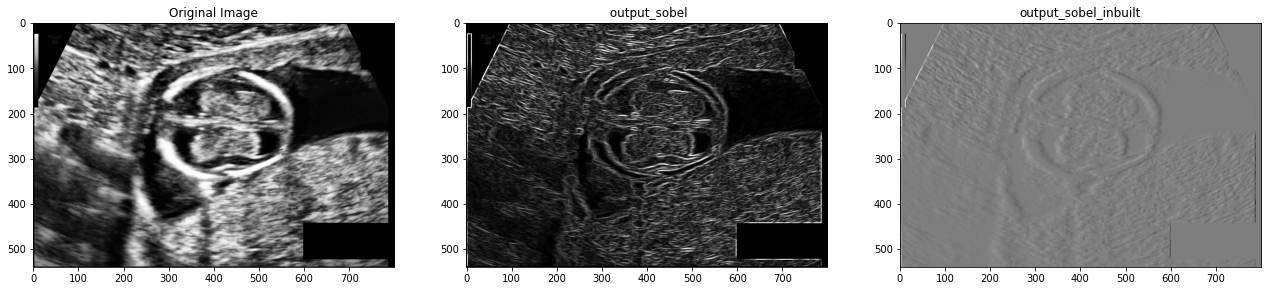

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
output_sobel=sobelEdge(clahe_img)
output_sobel_inbuilt=cv2.Sobel(clahe_img,cv2.CV_64F,1,0,ksize=3)
###Display
display = [clahe_img, output_sobel,output_sobel_inbuilt]
label = ['Original Image', ' output_sobel', 'output_sobel_inbuilt']

fig = plt.figure(figsize=(22,20))

for i in range(len(display)):
  fig.add_subplot(3,3, i+1)
  plt.imshow(display[i], cmap = 'gray')
  plt.title(label[i])

plt.show()
# fig.savefig('out/Part 2/Sobel_Edge.png')
# files.download('out/Part 2/Sobel_Edge.png')

**Laplacian Filter**

In [ ]:
def process(img, imfilter):
        """
            Process image with provided filter.
            params: Image pixel array.
            return: Edge detection map
        """
        im = img
        arr = np.array(im)
       
       # Apply Gaussian Smoothening
        
        out = convolve(arr, imfilter) # Apply the provided filter
        
        out = out.clip(min=0)

        return out
def laplacian(img):
        """
            Laplacian edge filter
            params: Input image.
            return: Edge intensity map
        """
      
        imfilter = np.array([[0, -1, 0],[-1, 4, -1],[0, -1, 0]])
        return process(img, imfilter)


In [ ]:
output_laplacian=laplacian(clahe_img)
##Inbuilt
sigma=3
img = cv2.GaussianBlur(clahe_img, (0, 0), sigma)
output_laplacian_inbuilt= cv2.Laplacian(img,cv2.CV_64F)


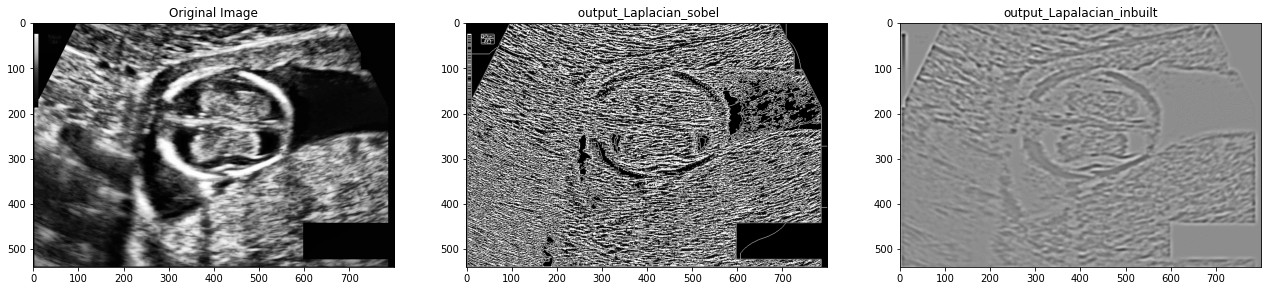

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
###Display
display = [clahe_img, output_laplacian,output_laplacian_inbuilt]
label = ['Original Image', ' output_Laplacian_sobel', 'output_Lapalacian_inbuilt']

fig = plt.figure(figsize=(22,20))

for i in range(len(display)):
  fig.add_subplot(3,3, i+1)
  plt.imshow(display[i], cmap = 'gray')
  plt.title(label[i])

plt.show()
# fig.savefig('out/Part 2/Laplacian_Edge.png')
# files.download('out/Part 2/Laplacian_Edge.png')

**Difference of gaussian and zero crossing**

In [ ]:
def difference_gaussian(img, sigma):
    """
            :param img : input image
            :param sigma : sigma is the std-deviation and refers to the spread of gaussian
           
    """
    size = int(2*(np.ceil(3*sigma))+1)

    x, y = np.meshgrid(np.arange(-size/2+1, size/2+1),
                       np.arange(-size/2+1, size/2+1))

    normal = 1 / (2.0 * np.pi * sigma**2)

    kernel = ((x**2 + y**2 - (2.0*sigma**2)) / sigma**4) * \
        np.exp(-(x**2+y**2) / (2.0*sigma**2)) / normal  # LoG filter

    kern_size = kernel.shape[0]
    log = np.zeros_like(img, dtype=float)

    # applying filter
    for i in range(img.shape[0]-(kern_size-1)):
        for j in range(img.shape[1]-(kern_size-1)):
            window = img[i:i+kern_size, j:j+kern_size] * kernel
            log[i, j] = np.sum(window)

    log = log.astype(np.int64, copy=False)

    zero_crossing = np.zeros_like(log)

    # computing zero crossing
    for i in range(log.shape[0]-(kern_size-1)):
        for j in range(log.shape[1]-(kern_size-1)):
            if log[i][j] == 0:
                if (log[i][j-1] < 0 and log[i][j+1] > 0) or (log[i][j-1] < 0 and log[i][j+1] < 0) or (log[i-1][j] < 0 and log[i+1][j] > 0) or (log[i-1][j] > 0 and log[i+1][j] < 0):
                    zero_crossing[i][j] = 255
            if log[i][j] < 0:
                if (log[i][j-1] > 0) or (log[i][j+1] > 0) or (log[i-1][j] > 0) or (log[i+1][j] > 0):
                    zero_crossing[i][j] = 255
    return log,zero_crossing
 

In [ ]:
sigma_log=3
log, zero_crossing=difference_gaussian(clahe_img, sigma_log)

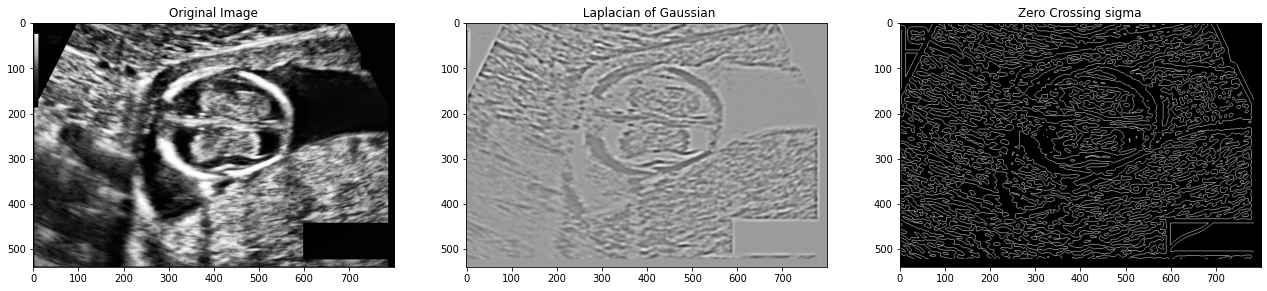

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
###Display
display = [clahe_img, log ,zero_crossing]
label = ['Original Image', ' Laplacian of Gaussian', 'Zero Crossing sigma']

fig = plt.figure(figsize=(22,20))

for i in range(len(display)):
  fig.add_subplot(3,3, i+1)
  plt.imshow(display[i], cmap = 'gray')
  plt.title(label[i])

plt.show()
# fig.savefig('out/Part 2/LaplacianOfGaussian_Edge.png')
# files.download('out/Part 2/LaplacianOfGaussian_Edge.png')